In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [65]:
country = "France"
year = 2022
geography = "commune_id"

In [66]:
df_transition = pd.read_csv(f"data_transition/{country}_{year}_{geography}_expanded.csv", encoding="latin-1")
df_transition = df_transition.drop(columns=["Unnamed: 0"])
df_transition.head()

,Nathalie.ARTHAUD.Emmanuel.MACRON,Fabien.ROUSSEL.Emmanuel.MACRON,Emmanuel.MACRON.Emmanuel.MACRON,Jean.LASSALLE.Emmanuel.MACRON,Marine.LE.PEN.Emmanuel.MACRON,Éric.ZEMMOUR.Emmanuel.MACRON,Jean.Luc.MÉLENCHON.Emmanuel.MACRON,Anne.HIDALGO.Emmanuel.MACRON,Yannick.JADOT.Emmanuel.MACRON,Valérie.PÉCRESSE.Emmanuel.MACRON,...,Jean.LASSALLE.Marine.LE.PEN,Marine.LE.PEN.Marine.LE.PEN,Éric.ZEMMOUR.Marine.LE.PEN,Jean.Luc.MÉLENCHON.Marine.LE.PEN,Anne.HIDALGO.Marine.LE.PEN,Yannick.JADOT.Marine.LE.PEN,Valérie.PÉCRESSE.Marine.LE.PEN,Philippe.POUTOU.Marine.LE.PEN,Nicolas.DUPONT.AIGNAN.Marine.LE.PEN,commune_id
0,0.0,0.0,0.903904,0.0,0.0,0.187197,0.822432,0.0,0.964152,0.901894,...,0.591447,0.995205,0.677440,0.174670,0.0,0.0,0.083099,0.0,0.817323,01001
1,0.0,0.0,0.969824,0.0,0.0,0.191137,0.835419,0.0,0.970033,0.914217,...,0.663838,0.964227,0.671859,0.161559,0.0,0.0,0.073076,0.0,NaN,01002
2,0.0,0.0,0.929724,0.0,0.0,0.176931,0.796289,0.0,0.961384,0.897413,...,0.660303,0.977158,0.689991,0.201496,0.0,0.0,0.087418,0.0,0.845935,01004
3,0.0,0.0,0.886053,0.0,0.0,0.171817,0.798627,0.0,0.956662,0.885485,...,0.656509,1.000000,0.698040,0.199054,0.0,0.0,0.097564,0.0,0.847524,01005
4,NaN,0.0,0.954245,0.0,0.0,0.188924,0.863002,0.0,0.973136,0.901282,...,0.657851,0.952263,0.671720,0.134003,0.0,0.0,0.084175,NaN,0.841193,01006


In [35]:
df_transition[["commune", "FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST"]].sort_values("FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST", ascending=False)

,commune,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST
57,COLCHANE,0.985450
99,GENERAL LAGOS,0.930975
26,CAMIÑA,0.894860
108,HUARA,0.738771
242,PUTRE,0.715228
...,...,...
81,DIEGO DE ALMAGRO,0.294999
6,ANDACOLLO,0.291664
171,MEJILLONES,0.287782
320,TOCOPILLA,0.283684


In [67]:
df_dv = pd.read_csv(f"data_output/{country}/{year}_divisiveness_{geography}.csv.gz", compression="gzip")
df_dv = df_dv.dropna()
df_dv = df_dv.pivot(index=geography, columns="candidate", values="value").reset_index()
df_dv.head()

candidate,commune_id,Emmanuel MACRON,Fabien ROUSSEL,Jean LASSALLE,Jean-Luc MÉLENCHON,Marine LE PEN,Nicolas DUPONT-AIGNAN,Valérie PÉCRESSE,Yannick JADOT,Éric ZEMMOUR
0,01004,0.024004,0.006592,0.004585,0.042030,0.013719,0.008440,0.008479,0.016511,0.014884
1,01007,0.036580,0.003642,0.003083,0.018389,0.050121,0.013784,0.004071,0.014125,0.000661
2,01014,0.008502,0.008185,0.023849,0.079163,0.020682,0.001841,0.006584,0.010691,0.013701
3,01015,0.112411,0.021535,0.031219,0.065909,0.026732,0.006021,0.014018,0.044853,0.008092
4,01024,0.003609,0.000908,0.001742,0.017447,0.002822,0.000951,0.002082,0.001185,0.011035


In [68]:
df = pd.merge(df_transition, df_dv, on=geography)
df.head()

,Nathalie.ARTHAUD.Emmanuel.MACRON,Fabien.ROUSSEL.Emmanuel.MACRON,Emmanuel.MACRON.Emmanuel.MACRON,Jean.LASSALLE.Emmanuel.MACRON,Marine.LE.PEN.Emmanuel.MACRON,Éric.ZEMMOUR.Emmanuel.MACRON,Jean.Luc.MÉLENCHON.Emmanuel.MACRON,Anne.HIDALGO.Emmanuel.MACRON,Yannick.JADOT.Emmanuel.MACRON,Valérie.PÉCRESSE.Emmanuel.MACRON,...,commune_id,Emmanuel MACRON,Fabien ROUSSEL,Jean LASSALLE,Jean-Luc MÉLENCHON,Marine LE PEN,Nicolas DUPONT-AIGNAN,Valérie PÉCRESSE,Yannick JADOT,Éric ZEMMOUR
0,0.0,0.0,0.929724,0.0,0.0,0.176931,0.796289,0.0,0.961384,0.897413,...,01004,0.024004,0.006592,0.004585,0.042030,0.013719,0.008440,0.008479,0.016511,0.014884
1,0.0,0.0,0.904245,0.0,0.0,0.169540,0.791077,0.0,0.956793,0.891517,...,01007,0.036580,0.003642,0.003083,0.018389,0.050121,0.013784,0.004071,0.014125,0.000661
2,0.0,0.0,0.950520,0.0,0.0,0.219473,0.846346,0.0,0.983696,0.942142,...,01014,0.008502,0.008185,0.023849,0.079163,0.020682,0.001841,0.006584,0.010691,0.013701
3,NaN,0.0,0.934382,0.0,0.0,0.186270,0.842730,0.0,0.957497,0.890200,...,01015,0.112411,0.021535,0.031219,0.065909,0.026732,0.006021,0.014018,0.044853,0.008092
4,0.0,0.0,0.913108,0.0,0.0,0.193164,0.832575,0.0,0.974308,0.908548,...,01024,0.003609,0.000908,0.001742,0.017447,0.002822,0.000951,0.002082,0.001185,0.011035


In [42]:
df.corr().dropna(axis=0, how="all").dropna(axis=1, how="all")

,GABRIEL.BORIC.FONT.GABRIEL.BORIC.FONT,JOSE.ANTONIO.KAST.RIST.GABRIEL.BORIC.FONT,YASNA.PROVOSTE.CAMPILLAY.GABRIEL.BORIC.FONT,SEBASTIAN.SICHEL.RAMIREZ.GABRIEL.BORIC.FONT,EDUARDO.ARTES.BRICHETTI.GABRIEL.BORIC.FONT,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.GABRIEL.BORIC.FONT,FRANCO.PARISI.FERNANDEZ.GABRIEL.BORIC.FONT,JOSE.ANTONIO.KAST.RIST.JOSE.ANTONIO.KAST.RIST,YASNA.PROVOSTE.CAMPILLAY.JOSE.ANTONIO.KAST.RIST,SEBASTIAN.SICHEL.RAMIREZ.JOSE.ANTONIO.KAST.RIST,FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST,FRANCO PARISI FERNANDEZ,GABRIEL BORIC FONT,JOSE ANTONIO KAST RIST,MARCO ENRIQUEZ-OMINAMI GUMUCIO,SEBASTIAN SICHEL RAMIREZ,YASNA PROVOSTE CAMPILLAY
GABRIEL.BORIC.FONT.GABRIEL.BORIC.FONT,1.000000,0.891341,0.831858,0.697222,0.537078,0.757582,0.653387,-0.887843,-0.826278,-0.673455,-0.618414,0.308126,0.203484,-0.388870,0.332980,-0.089694,0.293376
JOSE.ANTONIO.KAST.RIST.GABRIEL.BORIC.FONT,0.891341,1.000000,0.857474,0.796455,0.417070,0.838988,0.767912,-0.999818,-0.860403,-0.773349,-0.736269,0.226521,0.326033,-0.221624,0.351907,-0.168909,0.233118
YASNA.PROVOSTE.CAMPILLAY.GABRIEL.BORIC.FONT,0.831858,0.857474,1.000000,0.839100,0.665023,0.827657,0.770633,-0.852352,-0.999334,-0.816161,-0.728459,0.343085,0.257476,-0.302495,0.278529,-0.066055,0.256620
SEBASTIAN.SICHEL.RAMIREZ.GABRIEL.BORIC.FONT,0.697222,0.796455,0.839100,1.000000,0.432958,0.841753,0.707141,-0.795636,-0.843119,-0.997655,-0.672287,0.122347,0.381549,-0.164511,0.276255,-0.049401,0.144837
EDUARDO.ARTES.BRICHETTI.GABRIEL.BORIC.FONT,0.537078,0.417070,0.665023,0.432958,1.000000,0.405151,0.483576,-0.402220,-0.647405,-0.400857,-0.448936,0.264045,0.108985,-0.322644,0.181752,0.065537,0.097566
MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.GABRIEL.BORIC.FONT,0.757582,0.838988,0.827657,0.841753,0.405151,1.000000,0.759875,-0.838108,-0.824413,-0.835802,-0.736457,0.222480,0.291986,-0.230623,0.180762,-0.142549,0.303258
FRANCO.PARISI.FERNANDEZ.GABRIEL.BORIC.FONT,0.653387,0.767912,0.770633,0.707141,0.483576,0.759875,1.000000,-0.765276,-0.772613,-0.690559,-0.996880,0.129132,0.336671,-0.228021,0.210779,0.070394,0.164860
JOSE.ANTONIO.KAST.RIST.JOSE.ANTONIO.KAST.RIST,-0.887843,-0.999818,-0.852352,-0.795636,-0.402220,-0.838108,-0.765276,1.000000,0.855651,0.772906,0.733968,-0.223171,-0.324894,0.217575,-0.353887,0.170640,-0.232322
YASNA.PROVOSTE.CAMPILLAY.JOSE.ANTONIO.KAST.RIST,-0.826278,-0.860403,-0.999334,-0.843119,-0.647405,-0.824413,-0.772613,0.855651,1.000000,0.820462,0.730332,-0.341075,-0.265571,0.293374,-0.282200,0.068281,-0.246283
SEBASTIAN.SICHEL.RAMIREZ.JOSE.ANTONIO.KAST.RIST,-0.673455,-0.773349,-0.816161,-0.997655,-0.400857,-0.835802,-0.690559,0.772906,0.820462,1.000000,0.657458,-0.101768,-0.385630,0.158845,-0.260267,0.044580,-0.151109


Text(0.5, 15.0, 'Divisiveness Winner Candidate')

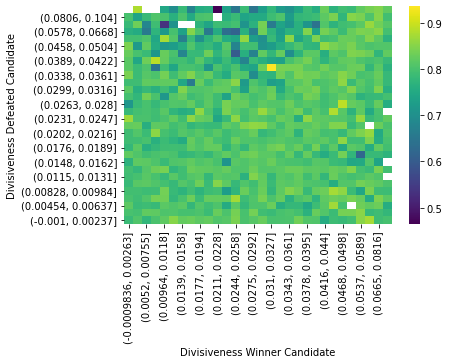

In [75]:
dd = df.copy()
dd["a"] = df["Jean.Luc.MÉLENCHON.Emmanuel.MACRON"]
dd["b"] = pd.qcut(df["Jean-Luc MÉLENCHON"], q=30).astype(str)
dd["c"] = pd.qcut(df["Emmanuel MACRON"], q=30).astype(str)
dd = dd.groupby(["b", "c"]).agg({"a": "mean"}).reset_index()
dd = dd.pivot(index="b", columns="c", values="a")
# dd = pd.merge
g = sns.heatmap(dd, cmap="viridis")
g.invert_yaxis()
g.set_ylabel("Divisiveness Defeated Candidate")
g.set_xlabel("Divisiveness Winner Candidate")
# dd

,GABRIEL.BORIC.FONT.GABRIEL.BORIC.FONT,JOSE.ANTONIO.KAST.RIST.GABRIEL.BORIC.FONT,YASNA.PROVOSTE.CAMPILLAY.GABRIEL.BORIC.FONT,SEBASTIAN.SICHEL.RAMIREZ.GABRIEL.BORIC.FONT,EDUARDO.ARTES.BRICHETTI.GABRIEL.BORIC.FONT,MARCO.ENRIQUEZ.OMINAMI.GUMUCIO.GABRIEL.BORIC.FONT,FRANCO.PARISI.FERNANDEZ.GABRIEL.BORIC.FONT,GABRIEL.BORIC.FONT.JOSE.ANTONIO.KAST.RIST,JOSE.ANTONIO.KAST.RIST.JOSE.ANTONIO.KAST.RIST,YASNA.PROVOSTE.CAMPILLAY.JOSE.ANTONIO.KAST.RIST,...,commune,FRANCO PARISI FERNANDEZ,GABRIEL BORIC FONT,JOSE ANTONIO KAST RIST,MARCO ENRIQUEZ-OMINAMI GUMUCIO,SEBASTIAN SICHEL RAMIREZ,YASNA PROVOSTE CAMPILLAY,a,b,c
0,0.949742,0.020852,0.686724,0.264877,0.963423,0.985241,0.540324,0,0.978836,0.301988,...,ALGARROBO,0.025077,0.052863,0.041479,0.017745,0.031024,0.025195,0.448470,"(0.0036299999999999995, 0.0277]","(0.0406, 0.0429]"
1,1.000000,0.079119,0.832955,0.288541,0.981943,1.000000,0.571258,0,0.920744,0.166022,...,ALHUE,0.051159,0.045682,0.035981,0.017818,0.042564,0.048127,0.424457,"(0.0506, 0.0548]","(0.018, 0.037]"
2,0.984204,0.063628,0.667072,0.256645,0.940064,0.996687,0.491406,0,0.935006,0.325642,...,ALTO BIOBIO,0.042624,0.048179,0.096494,0.021512,0.032676,0.081686,0.488495,"(0.0424, 0.0463]","(0.0676, 0.178]"
3,1.000000,0.072102,0.752323,0.266277,0.959988,0.997986,0.513345,0,0.926892,0.246872,...,ALTO DEL CARMEN,0.070034,0.041098,0.044341,0.019167,0.022970,0.117098,0.470104,"(0.0679, 0.131]","(0.0429, 0.0458]"
4,0.981200,0.045763,0.736997,0.254210,0.968298,0.989975,0.478302,0,0.953692,0.256739,...,ALTO HOSPICIO,0.090344,0.039171,0.046187,0.030064,0.024012,0.042261,0.512784,"(0.0679, 0.131]","(0.0458, 0.0474]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0.957908,0.004537,0.615811,0.226329,0.964545,0.983757,0.416028,0,0.995408,0.377187,...,YUMBEL,0.047818,0.037384,0.050618,0.022992,0.029000,0.043260,0.556851,"(0.0463, 0.0506]","(0.0505, 0.0537]"
341,0.974744,0.040746,0.683300,0.244689,0.958605,0.990911,0.465344,0,0.958531,0.310841,...,YUNGAY,0.046275,0.046500,0.049679,0.024192,0.032648,0.035934,0.512671,"(0.0424, 0.0463]","(0.0474, 0.0505]"
342,0.954121,0.000528,0.752683,0.285950,0.981614,0.983503,0.571109,0,0.999466,0.243207,...,ZAPALLAR,0.031465,0.038106,0.045994,0.027017,0.070989,0.028786,0.424609,"(0.0277, 0.0329]","(0.0458, 0.0474]"
343,0.956947,0.000000,0.502159,0.168660,0.959942,0.965892,0.384772,0,1.000000,0.489951,...,ÑIQUEN,0.024564,0.028514,0.039620,0.019470,0.026765,0.028640,0.585141,"(0.0036299999999999995, 0.0277]","(0.037, 0.0406]"


<AxesSubplot:xlabel='FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST', ylabel='FRANCO PARISI FERNANDEZ'>

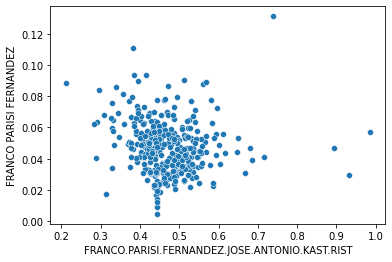

In [40]:
sns.scatterplot(x="FRANCO.PARISI.FERNANDEZ.JOSE.ANTONIO.KAST.RIST", y="FRANCO PARISI FERNANDEZ", data=df)